In [1]:
#Nama : Muhammad Daffa Saifullah
#Nim  : 1103204024

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
df = pd.read_csv(r"C:\Users\daffa\OneDrive\Documents\Kuliah\Semester 7\ML\week 6\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Mengganti nama kolom
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# Menampilkan DataFrame yang sudah diubah
print(df)

     CustomerID  Gender  Age  Annual Income  Spending Score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83

[200 rows x 5 columns]


In [6]:
# Menghapus kolom CustomerID dan Gender
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

# Menampilkan DataFrame setelah menghapus kolom
print(df)

     Age  Annual Income  Spending Score
0     19             15              39
1     21             15              81
2     20             16               6
3     23             16              77
4     31             17              40
..   ...            ...             ...
195   35            120              79
196   45            126              28
197   32            126              74
198   32            137              18
199   30            137              83

[200 rows x 3 columns]


C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

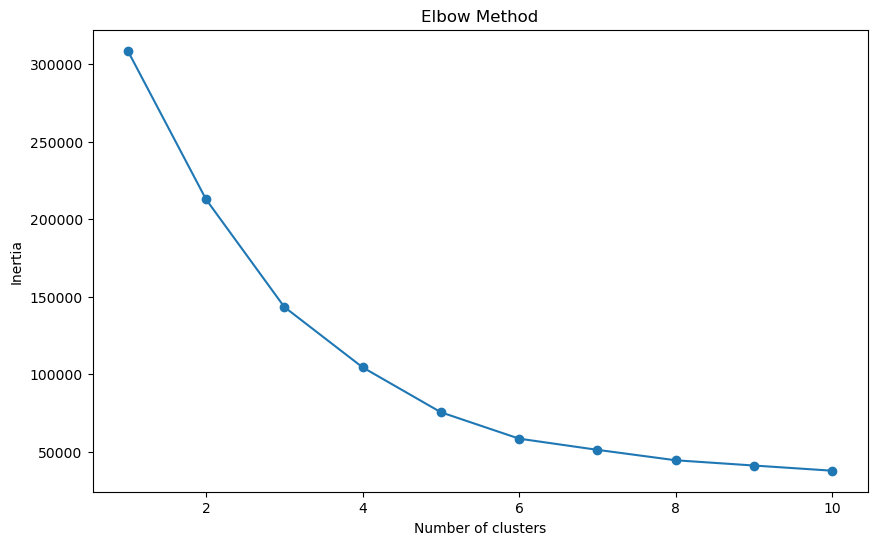

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membuat list kosong untuk menampung nilai inersia
inertia = []

# Mengambil kolom yang diperlukan
X = df[['Age', 'Annual Income', 'Spending Score']]

# Melakukan perulangan untuk nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan metode elbow
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


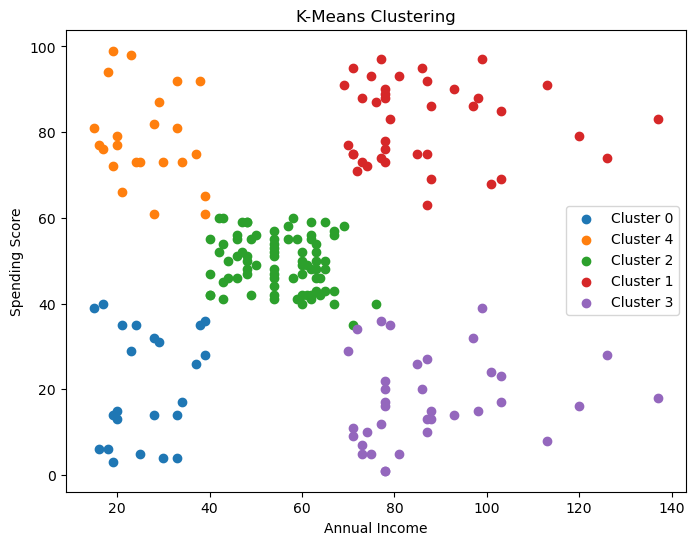

In [12]:
# Memilih kolom yang akan digunakan
data = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-Means dengan 5 kluster
kmeans = KMeans(n_clusters=5, random_state=0)
df['label'] = kmeans.fit_predict(data)

# Memvisualisasikan hasil clustering
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['Annual Income'], df[df['label'] == label]['Spending Score'], label=f'Cluster {label}')

plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

For k = 2, Silhouette Score = 0.293166070535953
For k = 3, Silhouette Score = 0.3839349967742105
For k = 4, Silhouette Score = 0.40546302077733304
For k = 5, Silhouette Score = 0.44428597560893024
For k = 6, Silhouette Score = 0.4523443947724053
For k = 7, Silhouette Score = 0.4412807576186172
For k = 8, Silhouette Score = 0.4280971079746162
For k = 9, Silhouette Score = 0.40126260157691634
For k = 10, Silhouette Score = 0.3790978814868016


C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


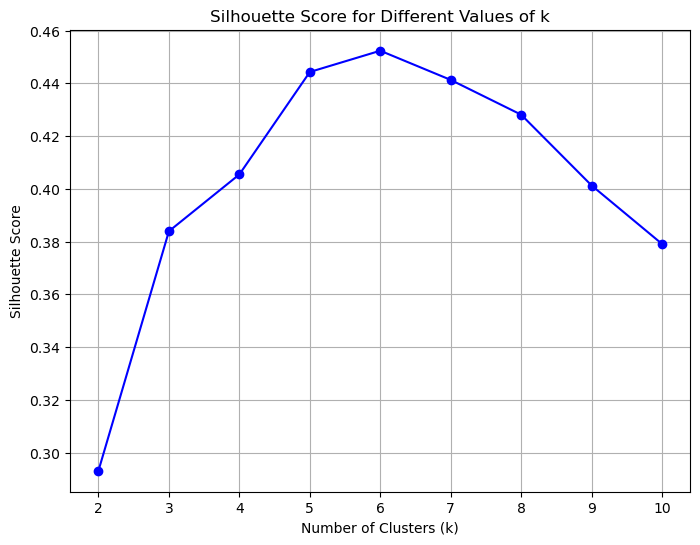

In [9]:
# Memilih kolom yang akan digunakan
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi daftar untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Menghitung Silhouette Score untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, Silhouette Score = {silhouette_avg}")

# Menampilkan hasil
k_values = range(2, 11)
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [10]:
# Memilih kolom yang akan digunakan
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi daftar untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Menghitung Davies-Bouldin Index untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)
    dbi_scores.append(dbi)
    print(f"For k = {k}, Davies-Bouldin Index = {dbi}")

# Menampilkan hasil
k_values = range(2, 11)
print("Davies-Bouldin Index Scores:")
print(dbi_scores)


C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

For k = 2, Davies-Bouldin Index = 1.3571023143309133
For k = 3, Davies-Bouldin Index = 0.8748062648492879
For k = 4, Davies-Bouldin Index = 0.8914904209843165
For k = 5, Davies-Bouldin Index = 0.8218781633199781
For k = 6, Davies-Bouldin Index = 0.746974007275528
For k = 7, Davies-Bouldin Index = 0.7863764854525301
For k = 8, Davies-Bouldin Index = 0.8641438876447516
For k = 9, Davies-Bouldin Index = 0.9070119449899816
For k = 10, Davies-Bouldin Index = 0.9573604236246045
Davies-Bouldin Index Scores:
[1.3571023143309133, 0.8748062648492879, 0.8914904209843165, 0.8218781633199781, 0.746974007275528, 0.7863764854525301, 0.8641438876447516, 0.9070119449899816, 0.9573604236246045]


C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
# Memilih kolom yang akan digunakan
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi daftar untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = []

# Menghitung Calinski-Harabasz Index untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    chi = calinski_harabasz_score(data, labels)
    chi_scores.append(chi)
    print(f"For k = {k}, Calinski-Harabasz Index = {chi}")

# Menampilkan hasil
k_values = range(2, 11)
print("Calinski-Harabasz Index Scores:")
print(chi_scores)


C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

For k = 2, Calinski-Harabasz Index = 89.28096999467428
For k = 3, Calinski-Harabasz Index = 113.70507138642179
For k = 4, Calinski-Harabasz Index = 127.9838294818919
For k = 5, Calinski-Harabasz Index = 151.04386000160667
For k = 6, Calinski-Harabasz Index = 166.7204931788687
For k = 7, Calinski-Harabasz Index = 162.2852042279988
For k = 8, Calinski-Harabasz Index = 163.58062876554533
For k = 9, Calinski-Harabasz Index = 156.15508760692356
For k = 10, Calinski-Harabasz Index = 152.26426170758603
Calinski-Harabasz Index Scores:
[89.28096999467428, 113.70507138642179, 127.9838294818919, 151.04386000160667, 166.7204931788687, 162.2852042279988, 163.58062876554533, 156.15508760692356, 152.26426170758603]


C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
